## Introduction 

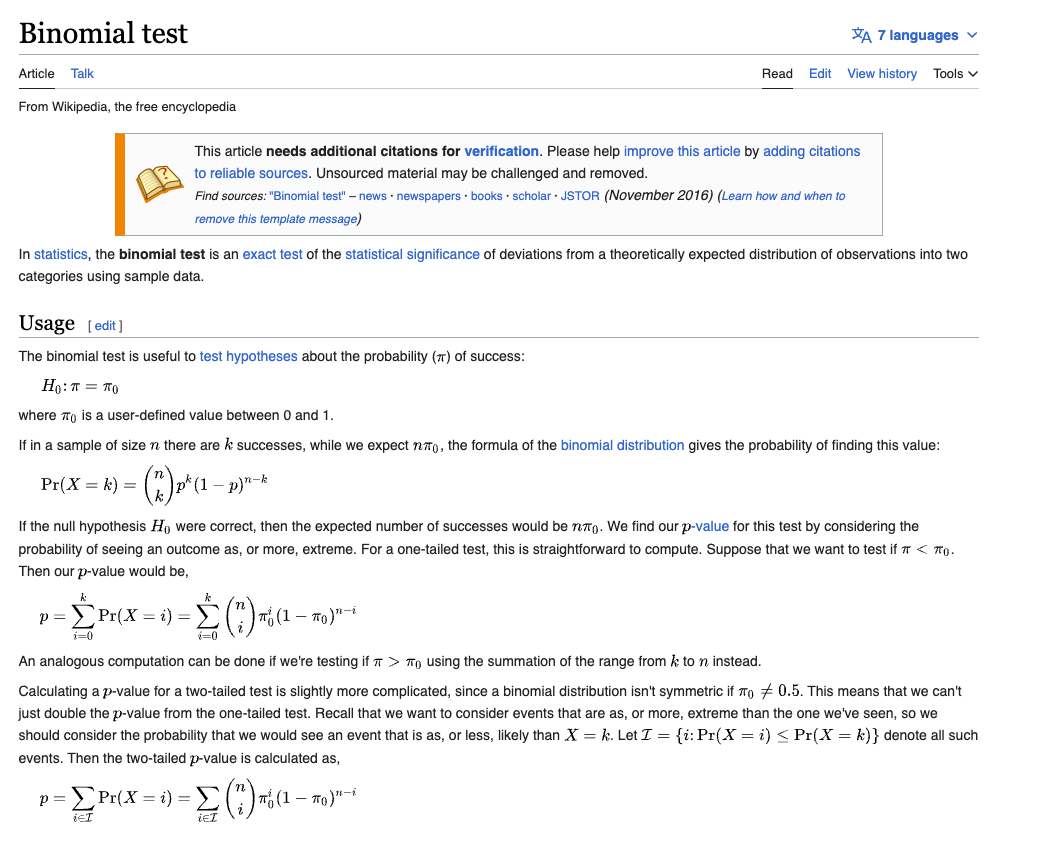

# Example  - 1 

Suppose we have a board game that depends on the roll of one die and attaches special importance to rolling a 6. In a particular game, the die is rolled 235 times, and 6 comes up 51 times. Is the die a fair one ?


<br> H0 : The die is fair . P(X=6) = 1/6 <br>
<br> Ha : It's biased towards six . P(X=6) >= 1/6 <br>

Given that the number of success are 51 , let's find out the probability of getting the observed results as/more extreme as the observed ones . 

In [6]:
from scipy import stats
print(" Greater test ",stats.binomtest(51, n=235, p=(1/6), alternative='greater')) # Z0 = 0.21 ,  p-value = P(X>=51)
print(" Two-sided ",stats.binomtest(51, n=235, p=(1/6), alternative='two-sided')) # Z0 = 0.21 , p-value = P( Z>=0.21 || Z<=-(0.21) ) 


 Greater test  BinomTestResult(k=51, n=235, alternative='greater', statistic=0.2170212765957447, pvalue=0.026544245711690867)
 Two-sided  BinomTestResult(k=51, n=235, alternative='two-sided', statistic=0.2170212765957447, pvalue=0.043747970182399884)


let's say the number of sizes are 21 , let's find out the probability of getting the observed results as/more extreme as the observed ones . 

In [7]:
from scipy import stats
print(" Two-sided ",stats.binomtest(21, n=235, p=(1/6), alternative='two-sided')) # Z0 = 0.089 ,  p-value = P( Z>=Z0 | Z<=Z0)
print(" Lesser test ",stats.binomtest(21, n=235, p=(1/6), alternative='less')) # Z0 = 0.089 ,  p-value = P( Z<=Z0 )


 Two-sided  BinomTestResult(k=21, n=235, alternative='two-sided', statistic=0.08936170212765958, pvalue=0.000837625343323886)
 Lesser test  BinomTestResult(k=21, n=235, alternative='less', statistic=0.08936170212765958, pvalue=0.00046999504982313993)


In Both the tests , P-value is less than 0,5 , we can conculde that the die is a fair die .

Let's look at some extreme examples

In [23]:
a = stats.binomtest(i, n=235, p=(1/6), alternative='two-sided')
a

BinomTestResult(k=59, n=235, alternative='two-sided', statistic=0.251063829787234, pvalue=0.0011138248896491966)

In [49]:
import pandas as pd

df = pd.DataFrame()

for i in range(1,235):
    print(i)
    print(" Two-sided ",stats.binomtest(i, n=235, p=(1/6), alternative='two-sided')) # Z0 = 0.089 ,  p-value = P( Z>=Z0 | Z<=Z0)
    print(" Lesser test ",stats.binomtest(i, n=235, p=(1/6), alternative='less')) # Z0 = 0.089 ,  p-value = P( Z<=Z0 )
    two_sided_p_value = stats.binomtest(i, n=235, p=(1/6), alternative='two-sided').pvalue
    lesser_p_value = stats.binomtest(i, n=235, p=(1/6), alternative='less').pvalue
    greater_p_value = stats.binomtest(i, n=235, p=(1/6), alternative='greater').pvalue
    statistic = stats.binomtest(i, n=235, p=(1/6), alternative='two-sided').statistic
    _df = pd.DataFrame({'x':[i] , 'two_sided_pvalue': [two_sided_p_value] , 'lesser_pvalue':[lesser_p_value] , 'statistic': [statistic] , 'greater_pvalue':[greater_p_value]})
    df = pd.concat([df,_df])



1
 Two-sided  BinomTestResult(k=1, n=235, alternative='two-sided', statistic=0.00425531914893617, pvalue=1.7121466729361174e-17)
 Lesser test  BinomTestResult(k=1, n=235, alternative='less', statistic=0.00425531914893617, pvalue=1.1848091955716615e-17)
2
 Two-sided  BinomTestResult(k=2, n=235, alternative='two-sided', statistic=0.00851063829787234, pvalue=4.78801519815242e-16)
 Lesser test  BinomTestResult(k=2, n=235, alternative='less', statistic=0.00851063829787234, pvalue=2.8331749889107357e-16)
3
 Two-sided  BinomTestResult(k=3, n=235, alternative='two-sided', statistic=0.01276595744680851, pvalue=1.068729958779771e-14)
 Lesser test  BinomTestResult(k=3, n=235, alternative='less', statistic=0.01276595744680851, pvalue=4.500142286620284e-15)
4
 Two-sided  BinomTestResult(k=4, n=235, alternative='two-sided', statistic=0.01702127659574468, pvalue=1.1007176034939605e-13)
 Lesser test  BinomTestResult(k=4, n=235, alternative='less', statistic=0.01702127659574468, pvalue=5.34153098242791

In [50]:
df

,x,two_sided_pvalue,lesser_pvalue,statistic,greater_pvalue
0,1,1.712147e-17,1.184809e-17,0.004255,1.000000e+00
0,2,4.788015e-16,2.833175e-16,0.008511,1.000000e+00
0,3,1.068730e-14,4.500142e-15,0.012766,1.000000e+00
0,4,1.100718e-13,5.341531e-14,0.017021,1.000000e+00
0,5,9.883744e-13,5.053915e-13,0.021277,1.000000e+00
...,...,...,...,...,...
0,230,2.447637e-170,1.000000e+00,0.978723,2.447637e-170
0,231,1.058648e-172,1.000000e+00,0.982979,1.058648e-172
0,232,3.647316e-175,1.000000e+00,0.987234,3.647316e-175
0,233,9.384092e-178,1.000000e+00,0.991489,9.384092e-178


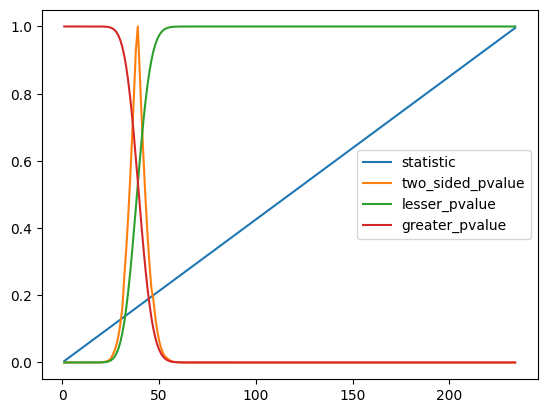

In [51]:
import matplotlib.pyplot as plt

plt.plot(df['x'],df['statistic'] , label = 'statistic')
plt.plot(df['x'],df['two_sided_pvalue'] , label = 'two_sided_pvalue')
plt.plot(df['x'],df['lesser_pvalue'] , label = 'lesser_pvalue')
plt.plot(df['x'],df['greater_pvalue'] , label = 'greater_pvalue')
plt.legend()
